# Feature extraction

In [1]:
import numpy as np
import pandas as pd 
import opensmile
import audiofile
import librosa
import matplotlib.pyplot as plt
import pickle

In [2]:
RAW_DATASET_PATH = "../dataset"
PROCESSED_DATASET_PATH = "../dataset_processed"

# Aggregated features

Open smile functional features set that come from [The Geneva Minimalistic Acoustic Parameter
Set (GeMAPS) for Voice Research and
Affective Computing](https://sail.usc.edu/publications/files/eyben-preprinttaffc-2015.pdf) :  
**F0semitoneFrom27.5Hz_sma3nz_amean:** The average fundamental frequency (pitch) in semitones relative to 27.5 Hz (A0).    
**F0semitoneFrom27.5Hz_sma3nz_stddevNorm:** Standard deviation of the normalized fundamental frequency.   
**F0semitoneFrom27.5Hz_sma3nz_percentile20.0:** 20th percentile of the fundamental frequency distribution.   
**F0semitoneFrom27.5Hz_sma3nz_percentile50.0:** Median (50th percentile) of the fundamental frequency distribution.   
**F0semitoneFrom27.5Hz_sma3nz_percentile80.0:** 80th percentile of the fundamental frequency distribution.   
**F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2:** Range between the 0th and 2nd percentiles of fundamental frequency.   
**F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope:** Mean rising slope of the fundamental frequency.   
**F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope:** Standard deviation of the rising slope of fundamental frequency.   
**F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope:** Mean falling slope of the fundamental frequency.   
**F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope:** Standard deviation of the falling slope of fundamental frequency.   
**loudness_sma3_amean:** Average loudness level.   
**loudness_sma3_stddevNorm:** Standard deviation of normalized loudness.   
**loudness_sma3_percentile20.0:** 20th percentile of loudness distribution.   
**loudness_sma3_percentile50.0:** Median (50th percentile) of loudness distribution.   
**loudness_sma3_percentile80.0:** 80th percentile of loudness distribution.   
**loudness_sma3_pctlrange0-2:** Range between the 0th and 2nd percentiles of loudness.   
**spectralFlux_sma3_amean:** Average spectral flux (rate of change of spectral energy).   
**mfcc1_sma3_amean:** Average value of the first Mel-frequency cepstral coefficient (MFCC).   
**mfcc2_sma3_amean:** Average value of the second MFCC.   
**mfcc3_sma3_amean:** Average value of the third MFCC.   
**mfcc4_sma3_amean:** Average value of the fourth MFCC.   
**jitterLocal_sma3nz_amean:** Average local jitter (variation in pitch period).   
**shimmerLocaldB_sma3nz_amean:** Average local shimmer (variation in amplitude).   
**HNRdBACF_sma3nz_amean:** Average harmonics-to-noise ratio (HNR) based on autocorrelation function.   
**logRelF0-H1-H2_sma3nz_amean:** Average logarithmic relative difference between harmonics H1 and H2.   
**logRelF0-H1-A3_sma3nz_amean:** Average logarithmic relative difference between harmonics H1 and A3.   
**F1frequency_sma3nz_amean:** Average first formant frequency.   
**F1bandwidth_sma3nz_amean:** Average bandwidth of the first formant.   
**F1amplitudeLogRelF0_sma3nz_amean:** Average logarithmic relative difference between the first formant and fundamental frequency.  
**F2frequency_sma3nz_amean:** The average frequency of the second formant (F2) in the speech signal.  
**F2frequency_sma3nz_stddevNorm:** Standard deviation of the normalized F2 frequency.  
**F2bandwidth_sma3nz_amean:** The average bandwidth of the second formant (F2).  
**F2bandwidth_sma3nz_stddevNorm:** Standard deviation of the normalized F2 bandwidth.  
**F2amplitudeLogRelF0_sma3nz_amean:** Average logarithmic relative difference between the second formant (F2) and fundamental frequency (F0).  
**F2amplitudeLogRelF0_sma3nz_stddevNorm:** Standard deviation of the normalized F2 amplitude relative to F0.  
**F3frequency_sma3nz_amean:** The average frequency of the third formant (F3) in the speech signal.  
**F3frequency_sma3nz_stddevNorm:** Standard deviation of the normalized F3 frequency.  
**F3bandwidth_sma3nz_amean:** The average bandwidth of the third formant (F3).  
**F3bandwidth_sma3nz_stddevNorm:** Standard deviation of the normalized F3 bandwidth.  
**F3amplitudeLogRelF0_sma3nz_amean:** Average logarithmic relative difference between the third formant (F3) and fundamental frequency (F0).  
**F3amplitudeLogRelF0_sma3nz_stddevNorm:** Standard deviation of the normalized F3 amplitude relative to F0.  
**alphaRatioV_sma3nz_amean:** A ratio related to the spectral shape of the audio signal (V stands for voiced segments).  
**alphaRatioV_sma3nz_stddevNorm:** Standard deviation of the normalized alpha ratio for voiced segments.  
**hammarbergIndexV_sma3nz_amean:** A measure related to the noisiness of the audio (V stands for voiced segments).  
**hammarbergIndexV_sma3nz_stddevNorm:** Standard deviation of the normalized Hammarberg index for voiced segments.  
**slopeV0-500_sma3nz_amean:** Slope of the audio signal in the frequency range from 0 Hz to 500 Hz (V stands for voiced segments).  
**slopeV0-500_sma3nz_stddevNorm:** Standard deviation of the normalized slope for voiced segments in the low-frequency range.  
**slopeV500-1500_sma3nz_amean:** Slope of the audio signal in the frequency range from 500 Hz to 1500 Hz (V stands for voiced segments).  
**slopeV500-1500_sma3nz_stddevNorm:** Standard deviation of the normalized slope for voiced segments in the mid-frequency range.  
**spectralFluxV_sma3nz_amean:** Average spectral flux (rate of change of spectral energy) for voiced segments.  
**mfcc1V_sma3nz_amean, mfcc2V_sma3nz_amean, mfcc3V_sma3nz_amean, mfcc4V_sma3nz_amean:** Average values of the first four Mel-frequency cepstral coefficients (MFCCs) for voiced segments.  
**alphaRatioUV_sma3nz_amean:** A ratio related to the spectral shape of the audio signal (UV stands for unvoiced segments).  
**hammarbergIndexUV_sma3nz_amean:** A measure related to the noisiness of the audio (UV stands for unvoiced segments).  
**slopeUV0-500_sma3nz_amean:** Slope of the audio signal in the frequency range from 0 Hz to 500 Hz (UV stands for unvoiced segments).  
**slopeUV500-1500_sma3nz_amean:** Slope of the audio signal in the frequency range from 500 Hz to 1500 Hz (UV stands for unvoiced segments).  
**spectralFluxUV_sma3nz_amean:** Average spectral flux (rate of change of spectral energy) for unvoiced segments.  
**loudnessPeaksPerSec:** Number of loudness peaks per second.  
**VoicedSegmentsPerSec:** Number of voiced segments per second.  
**MeanVoicedSegmentLengthSec:** Mean duration of voiced segments in seconds.  
**StddevVoicedSegmentLengthSec:** Standard deviation of the duration of voiced segments in seconds.  
**MeanUnvoicedSegmentLength:** This feature represents the average duration (length) of unvoiced segments in the speech signal.   
**StddevUnvoicedSegmentLength:** The standard deviation of the duration of unvoiced segments.   
**equivalentSoundLevel_dBp:** The equivalent sound level in decibels (dB) relative to a reference pressure level.  

In [3]:
df_data = pd.read_csv(f"{RAW_DATASET_PATH}\speech_dataset_no_meld.csv")
audio_files = [f"{RAW_DATASET_PATH}/{p}" for p in df_data['Filepath'].to_list()]

In [4]:
functional_smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

In [5]:
functional_features = functional_smile.process_files(audio_files)
functional_features.reset_index(inplace=True)
functional_features.drop(columns=['start', 'end'], inplace=True)
functional_features.rename(columns={'file': 'filepath'}, inplace=True)
functional_features['Emotion'] = df_data['Emotion']

In [6]:
functional_features

,filepath,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Emotion
0,../dataset/crema-d\AudioWAV\1001_DFA_ANG_XX.wav,30.205763,0.111424,26.859524,29.962118,30.452559,3.593035,37.707050,0.000000,-90.197304,...,-0.003541,0.171762,1.769912,2.262443,0.070000,0.037947,0.291667,0.297457,-23.766516,Anger
1,../dataset/crema-d\AudioWAV\1001_DFA_DIS_XX.wav,26.873123,0.001824,26.831245,26.881100,26.918194,0.086948,0.000000,0.000000,-0.030169,...,-0.001954,0.125241,2.155173,0.440529,0.030000,0.000000,1.105000,0.365000,-32.991600,Disgust
2,../dataset/crema-d\AudioWAV\1001_DFA_FEA_XX.wav,35.078461,0.032588,34.017204,35.486549,36.192776,2.175571,8.894318,4.014902,14.088568,...,-0.000504,0.085873,1.860465,0.952381,0.250000,0.100000,0.516667,0.343738,-22.264631,Fear
3,../dataset/crema-d\AudioWAV\1001_DFA_HAP_XX.wav,31.898449,0.053836,30.495773,31.866287,34.084057,3.588284,29.575644,13.792812,190.025024,...,-0.003494,0.202602,2.162162,3.333333,0.050000,0.019149,0.195714,0.262834,-23.781778,Happy
4,../dataset/crema-d\AudioWAV\1001_DFA_NEU_XX.wav,34.026699,0.271494,26.421556,28.848995,45.166256,18.744699,158.633102,0.000000,-403.536621,...,0.000084,0.106344,2.475248,1.522843,0.063333,0.032998,0.427500,0.393343,-30.276972,Neutral


In [7]:
with open(f'{PROCESSED_DATASET_PATH}/functional_features.pkl', 'wb') as f:
    pickle.dump(functional_features, f)

If nedded we could think about aplying some feature selection technique

In [8]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

num_features = 30

estimator = SVC(kernel="linear", C=1)
rfe = RFE(estimator, n_features_to_select=num_features)

X = functional_features.drop(columns=['Emotion','filepath'])
y = functional_features['Emotion']  
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

print(selected_features)


Index(['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
       'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope',
       'loudness_sma3_meanFallingSlope', 'mfcc4_sma3_amean',
       'logRelF0-H1-H2_sma3nz_amean', 'logRelF0-H1-H2_sma3nz_stddevNorm',
       'F1frequency_sma3nz_amean', 'F1bandwidth_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_amean', 'F2frequency_sma3nz_amean',
       'F2bandwidth_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F3frequency_sma3nz_amean', 'F3bandwidth_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_amean', 'mf

# MFCC

In [9]:
mfcc_features = []
for i in range(len(audio_files)):
    y, sr = librosa.load(audio_files[i])
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_features.append(mfcc)

In [10]:
with open(f'{PROCESSED_DATASET_PATH}/mfcc_features.pkl', 'wb') as file:
    pickle.dump(mfcc_features, file)

In [11]:
np.unique([mfcc.shape for mfcc in mfcc_features])

array([ 20,  81,  88,  94,  99, 101])

In [12]:
# pad the mfcc features to have the same length, during training we can use masking to ignore the padded values
max_len = max([mfcc.shape[1] for mfcc in mfcc_features])
mfccs_padded = [np.pad(mfcc, ((0, 0), (0, max_len - mfcc.shape[1])), mode='constant') for mfcc in mfcc_features]

In [13]:
with open(f'{PROCESSED_DATASET_PATH}/mfccs_padded.pkl', 'wb') as file:
    pickle.dump(np.array(mfccs_padded), file)

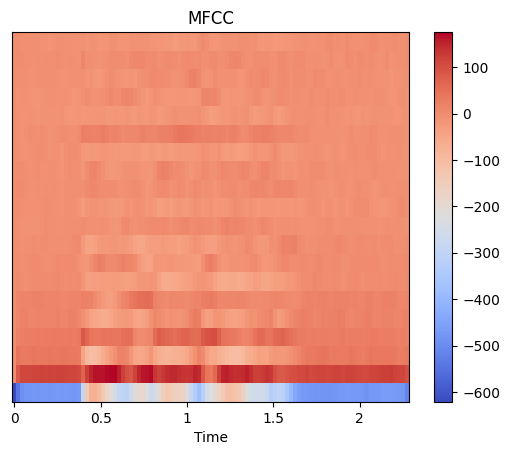

In [14]:
img = librosa.display.specshow(mfcc_features[0], x_axis='time')
plt.colorbar(img)
plt.title('MFCC')  
plt.show()

# MEL Spectogram

In [15]:
spectogram_features = []
for i in range(len(audio_files)):
    y, sr = librosa.load(audio_files[i])
    spectogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectogram_features.append(spectogram)

In [16]:
with open(f'{PROCESSED_DATASET_PATH}/spectrogram_features.pkl', 'wb') as file:
    pickle.dump(spectogram_features, file)

In [17]:
np.unique([spectogram.shape for spectogram in spectogram_features])

array([ 81,  88,  94,  99, 101, 128])

In [18]:
# pad the mel spectograms to have the same length, during training we can use masking to ignore the padded values
max_len = max([spectogram.shape[1] for spectogram in spectogram_features])
spectogram_padded = [np.pad(spectogram, ((0, 0), (0, max_len - spectogram.shape[1])), mode='constant') for spectogram in spectogram_features]

In [19]:
with open(f'{PROCESSED_DATASET_PATH}/spectrogram_padded.pkl', 'wb') as file:
    pickle.dump(np.array(spectogram_padded), file)

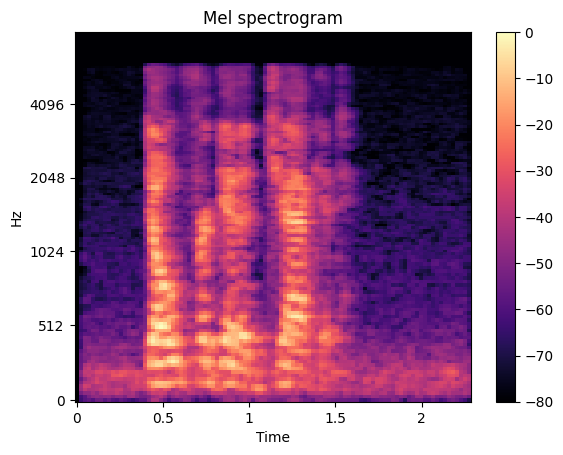

In [20]:
img = librosa.display.specshow(librosa.power_to_db(spectogram_features[0], ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(img)
plt.title('Mel spectrogram')
plt.show()

# Aggragated features v2
that come from [Emotion Recognition from Chinese Speech for Smart Affective Services Using a Combination of SVM and DBN](https://www.mdpi.com/1424-8220/17/7/1694)

In [21]:
def extract_features(audio,sr):
    pitch = librosa.yin(audio, fmin=75, fmax=300, sr=sr)
    energy = librosa.feature.rms(y=audio)
    zero_crossing = librosa.feature.zero_crossing_rate(audio)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    formants = librosa.effects.harmonic(audio)
    results = {
        'pitch': pitch,
        'energy': energy,
        'zero_crossing': zero_crossing,
        'mfcc': mfcc,
        'formants': formants
    }
    return results



In [22]:
features = ['pitch', 'energy', 'zero_crossing', 'mfcc', 'formants']
statistics = ['mean', 'std', 'min', 'max','var']
custom_features = {f'{feature}_{statistic}'  : [] for feature in features for statistic in statistics}
for i in range(len(audio_files)):
    y, sr = librosa.load(audio_files[i])
    features = extract_features(y, sr)
    for feature in features:
        for statistic in statistics:
            custom_features[f'{feature}_{statistic}'].append(np.__getattribute__(statistic)(features[feature]))

In [23]:
custom_df = pd.DataFrame(custom_features)

In [24]:
custom_df

,pitch_mean,pitch_std,pitch_min,pitch_max,pitch_var,energy_mean,energy_std,energy_min,energy_max,energy_var,...,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,mfcc_var,formants_mean,formants_std,formants_min,formants_max,formants_var
0,151.402690,54.587961,75.0,302.054795,2979.845464,0.040486,0.049893,0.000927,0.191608,0.002489,...,-17.817297,109.433167,-620.808838,175.306290,11975.618164,6.838159e-07,0.025318,-0.193182,0.207534,0.000641
1,149.807145,60.476073,75.0,275.096385,3657.355425,0.015566,0.015932,0.002801,0.069885,0.000254,...,-18.545635,118.919868,-518.200256,188.482147,14141.934570,8.997978e-07,0.008732,-0.099000,0.086576,0.000076
2,166.494702,56.691632,75.0,291.555511,3213.941192,0.044071,0.062436,0.003146,0.224669,0.003898,...,-18.392935,111.352821,-486.365601,164.243210,12399.450195,-4.621998e-07,0.038816,-0.329873,0.306182,0.001507
3,171.548728,48.618162,75.0,249.907899,2363.725671,0.040840,0.049474,0.003370,0.189180,0.002448,...,-18.045366,107.705544,-477.773376,170.651611,11600.484375,2.242286e-06,0.025088,-0.219349,0.213146,0.000629
4,145.623400,58.545231,75.0,290.567732,3427.544121,0.019763,0.023160,0.003755,0.101337,0.000536,...,-18.101955,111.479004,-497.291992,177.403595,12427.568359,-7.259619e-07,0.013524,-0.139005,0.127176,0.000183


In [25]:
with open(f'{PROCESSED_DATASET_PATH}/aggregated_features.pkl', 'wb') as file:
    pickle.dump(custom_df, file)